## Descriptive Statistics

In [1]:
# Plotly
import plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Matplotlib
import matplotlib.pyplot as plt

# Word Cloud
import wordcloud
from wordcloud import WordCloud

# Other
import pandas as pd
import numpy as np
import datetime as dt
import os

pio.renderers.default = "notebook_connected"

In [2]:
# Current and data working directory
cwd = os.getcwd()
dwd = cwd + "\\data_csv\\"

In [3]:
# Import csv data sets
tweetslat  = pd.read_csv(dwd + "tweetslat.csv"   , low_memory = False)

In [4]:
tweetslat.columns

Index(['user_id', 'country', 'protest', 'timestamp', 'text', 'hashtags',
       'mentioned_users', 'likes', 'retweets', 'cleaned_text', 'clean_text_2'],
      dtype='object')

In [5]:
tweetslat['clean_text_2'] = tweetslat['clean_text_2'].str.replace("'","").str.strip("][").str.split(",")
tweetslat['words']        = tweetslat['clean_text_2'].apply(lambda x: ''.join(x))
tweetslat['timestamp']    = pd.to_datetime(tweetslat['timestamp'])

In [6]:
tweetslat['hour']   = pd.to_datetime(tweetslat['timestamp']).dt.hour
tweetslat['month']  = pd.to_datetime(tweetslat['timestamp']).dt.month
tweetslat['day']    = pd.to_datetime(tweetslat['timestamp']).dt.day

In [7]:
tweetslat['n'] = 1

### Count of tweets by hour

In [8]:
temp = tweetslat.groupby(['country','hour','protest'])['n'].count().reset_index()

px.bar(temp, 
       x = 'hour', 
       y = 'n', 
       facet_col = 'protest',
       labels    = {'n':'Count', 'hour':'Hour','country':'Country'},
       color     = 'country',
       width  = 900, height = 400,
       color_discrete_sequence  = ["#031926","#468189","#63B4D1"]).show()

### Count tweets by day

In [9]:
temp = tweetslat.groupby(['country','day','protest'])['n'].count().reset_index()

px.line(temp, 
        x = 'day', 
        y = 'n', 
        facet_col = 'protest',
        labels    = {'n':'Count', 'day':'Day','country':'Country'},
        color     = 'country',
        width  = 900, height = 400,
        color_discrete_sequence  = ["#031926","#468189","#63B4D1"]).show()

### Count tweets by month

In [10]:
temp = tweetslat.groupby(['country','month','protest'])['n'].count().reset_index()

px.bar(temp, 
       x = 'month', 
       y = 'n', 
       facet_col = 'protest',
       labels    = {'n':'Count', 'month':'Month','country':'Country'},
       color     = 'country',
       width  = 900, height = 400,
       color_discrete_sequence  = ["#031926","#468189","#63B4D1"]).show()

### Word clouds by country

#### Bolivia

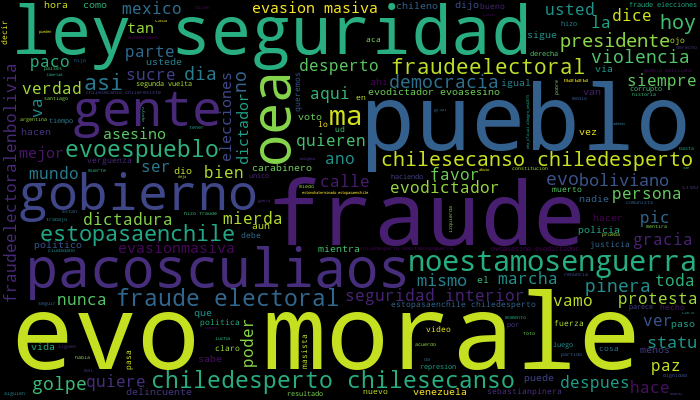

In [11]:
# Country data and words to be eliminated 
data = tweetslat.loc[(tweetslat.country == "bol") & (tweetslat.protest == 1),"words"]
omit = set({"bolivia", "si", "ahora", "twitter", "com", "pais", "chile", "solo"})

WordCloud(stopwords = omit, width = 700, height = 400).generate(' '.join(data)).to_image()

#### Chile

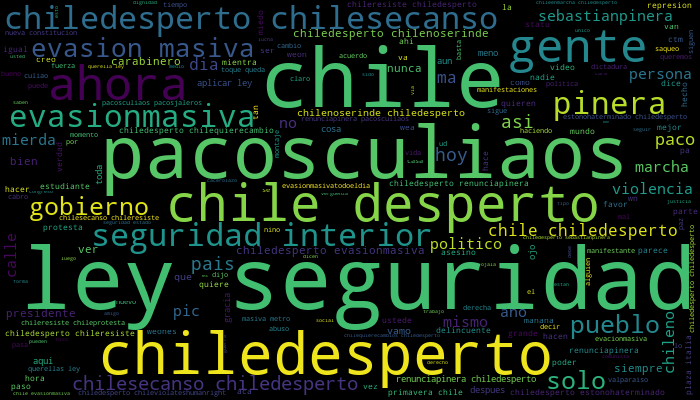

In [12]:
# Country data and words to be eliminated 
data = tweetslat.loc[(tweetslat.country == "chi") & (tweetslat.protest == 1),"words"]
omit = set({"twitter", "com", "si"})

WordCloud(stopwords = omit, width = 700, height = 400).generate(' '.join(data)).to_image()

#### Colombia

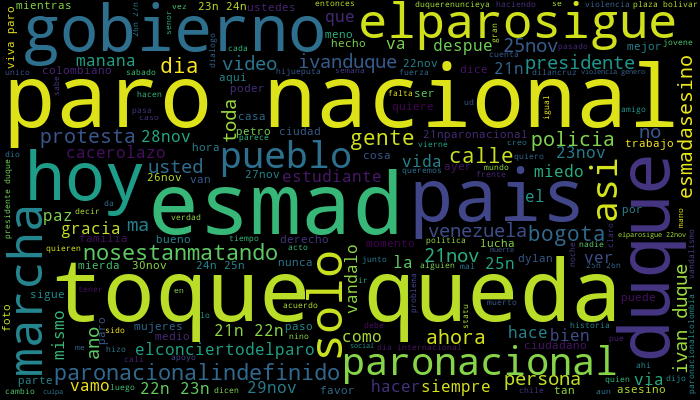

In [13]:
# Country data and words to be eliminated 
data = tweetslat.loc[(tweetslat.country == "col") & (tweetslat.protest == 1),"words"]
omit = set({"twitter", "com", "colombia", "si", "pic"})

WordCloud(stopwords = omit, width = 700, height = 400).generate(' '.join(data)).to_image()

### Top hashtags by country

#### Bolivia

In [14]:
omit  = set({"bolivia","latinoamerica","panama","si","pais"})
words = [j.strip() for lword in tweetslat.loc[(tweetslat['country'] == "bol") & (tweetslat['protest'] == 1),'clean_text_2'] for j in lword if j.strip() not in omit]
words = pd.DataFrame({"words": words, "n": 1})
words = words.groupby(["words"])['n'].count().reset_index()
words = words.nlargest(25,'n')

In [15]:
px.bar(words, 
       x      = "words",
       y      = "n",
       labels = {"n": "Frequency"},
       width  = 900, height = 500,
       color_discrete_sequence  = ["#A05C7B"]).show()

#### Chile

In [16]:
omit  = set({"chile","si","ser","solo","asi","santiagodechile"})
words = [j.strip() for lword in tweetslat.loc[(tweetslat['country'] == "chi") & (tweetslat['protest'] == 1),'clean_text_2'] for j in lword if j.strip() not in omit]
words = pd.DataFrame({"words": words, "n": 1})
words = words.groupby(["words"])['n'].count().reset_index()
words = words.nlargest(25,'n')

In [17]:
px.bar(words, 
       x      = "words",
       y      = "n",
       labels = {"n": "Frequency"},
       width  = 900, height = 500,
       color_discrete_sequence  = ["#A05C7B"]).show()

#### Colombia

In [18]:
omit  = set({"colombia","pais","si"})
words = [j.strip() for lword in tweetslat.loc[(tweetslat['country'] == "col") & (tweetslat['protest'] == 1),'clean_text_2'] for j in lword if j.strip() not in omit]
words = pd.DataFrame({"words": words, "n": 1})
words = words.groupby(["words"])['n'].count().reset_index()
words = words.nlargest(25,'n')

In [19]:
px.bar(words, 
       x      = "words",
       y      = "n",
       labels = {"n": "Frequency"},
       width  = 900, height = 500,
       color_discrete_sequence  = ["#A05C7B"]).show()